# 📘 Radioactive Decay: Half-Life Determination> Fit exponential decay to nuclear decay data⏱️ **15-20 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Physics** | 🔬 **Nuclear**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/physics/radioactive_decay.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Model:** $N(t) = N_0 e^{-\lambda t}$**Where:**- $N_0$: Initial number of nuclei- $\lambda$: Decay constant- $t$: Time**Applications:** Dating, nuclear medicine, radiation safety---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def radioactive_decay(t, N0, lambda_decay):
    return N0 * jnp.exp(-lambda_decay * t)

## Generate Decay Data

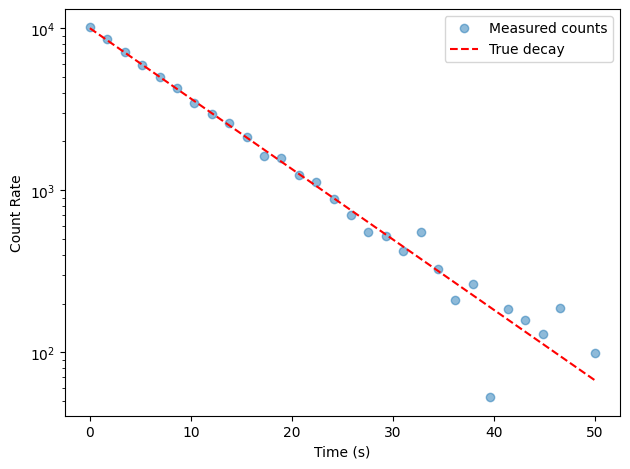

In [5]:
N0_true = 10000
lambda_true = 0.1  # 1/s
t = np.linspace(0, 50, 30)
N_true = radioactive_decay(t, N0_true, lambda_true)
N = N_true + np.random.normal(0, 100, len(t))

plt.semilogy(t, N, 'o', alpha=0.5, label='Measured counts')
plt.semilogy(t, N_true, 'r--', label='True decay')
plt.xlabel('Time (s)')
plt.ylabel('Count Rate')
plt.legend()
plt.tight_layout()
plt.tight_layout()
plt.show()


## Determine Half-Life

In [6]:
popt, pcov = curve_fit(radioactive_decay, t, N, p0=[9500, 0.09])
N0_fit, lambda_fit = popt
perr = np.sqrt(np.diag(pcov))

t_half = np.log(2) / lambda_fit
t_half_err = t_half * (perr[1] / lambda_fit)

print(f'Decay constant (λ): {lambda_fit:.4f} ± {perr[1]:.4f} s⁻¹')
print(f'Half-life (t₁/₂):    {t_half:.2f} ± {t_half_err:.2f} s')
print(f'\nAfter 1 half-life: {50}% remain')
print(f'After 2 half-lives: {25}% remain')

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=30 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=30 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=661098.9395706666 | grad_norm=9.1720e+07 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=76996.52622106466 | grad_norm=4.6264e+06 | step=9500.000000426317 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=75554.89689390981 | grad_norm=4.2366e+04 | step=9500.000000426317 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=75554.79370909234 | grad_norm=242.3331 | step=9500.000000426317 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.455693s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=7.5555e+04 | elapsed=1.456s | final_gradient_norm=1.4108


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=2.046736s


INFO:nlsq.curve_fit:Curve fit completed total_time=2.0467 | final_cost=1.5111e+05 | covariance_warning=False


Decay constant (λ): 0.1011 ± 0.0008 s⁻¹
Half-life (t₁/₂):    6.86 ± 0.05 s

After 1 half-life: 50% remain
After 2 half-lives: 25% remain


## Key Insights1. **Linear on log scale** confirms exponential decay2. **Half-life constant** - characteristic of isotope3. **Statistical fluctuations** inherent in nuclear decay---